# Mobile Price Prediction Unveiling Patterns in the Smartphone Market

In [108]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

print("All Libraries imported successfully!")

All Libraries imported successfully!


In [109]:
# Load the dataset
dataset_path = "C:\\Users\\n\\Downloads\\mobile prices.csv"
mobile_data = pd.read_csv(dataset_path)
print("Mobile price data Loaded successfully!")

Mobile price data Loaded successfully!


In [110]:
# Display the first few rows of the dataset
print(mobile_data.head())

   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_

In [111]:
# Display the last few rows of the dataset
print(mobile_data.tail())

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
1995    

# 1. Introduction to Data Mining and Big Data

In [112]:
# 1. Introduction to Data Mining and Big Data
print("1. Introduction to Data Mining and Big Data:")
print("   - Data mining and big data play a crucial role in predicting mobile prices.")
print("   - Mobile company can benefit from data-driven insights to compete with industry giants.")
print("\n")


1. Introduction to Data Mining and Big Data:
   - Data mining and big data play a crucial role in predicting mobile prices.
   - Mobile company can benefit from data-driven insights to compete with industry giants.




# 2. Data Types and Data Preprocessing

In [113]:
# 2. Data Types and Data Preprocessing
print("2. Data Types and Data Preprocessing:")
# Display data types of each column
print(mobile_data.dtypes)
# Check for missing values
print("Missing Values:")
print(mobile_data.isnull().sum())


2. Data Types and Data Preprocessing:
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object
Missing Values:
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: i

In [114]:
#Statistical Summary
mobile_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [115]:
#Print the number of unique values for each column
mobile_data.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [116]:
#Print information about the DataFrame
mobile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

# 3. Data Exploration + Visualization

3. Data Exploration + Visualization:
Dataset Statistics:
       battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.2

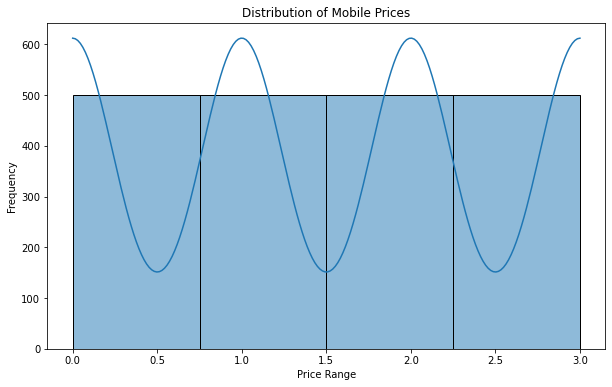

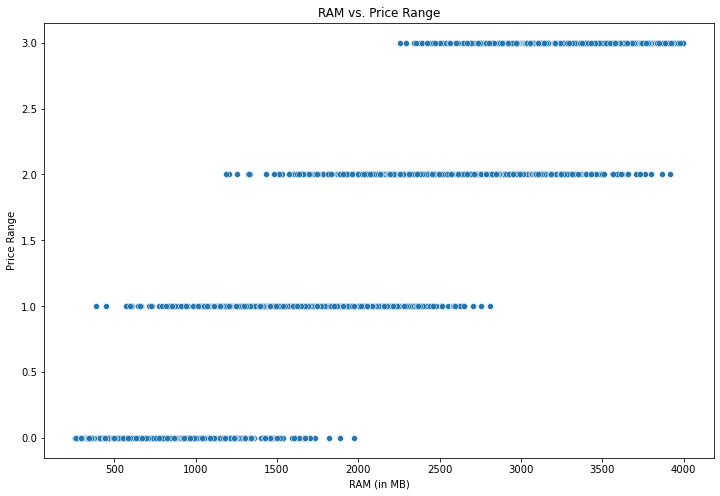

In [117]:
# 3. Data Exploration + Visualization
print("3. Data Exploration + Visualization:")
# Explore dataset characteristics
print("Dataset Statistics:")
print(mobile_data.describe())

# Visualize distribution of mobile prices
plt.figure(figsize=(10, 6))
sns.histplot(mobile_data['price_range'], bins=4, kde=True)
plt.title('Distribution of Mobile Prices')
plt.xlabel('Price Range')
plt.ylabel('Frequency')
plt.show()
# Visualize relationships between features (e.g., RAM vs. Price)
plt.figure(figsize=(12, 8))
sns.scatterplot(x='ram', y='price_range', data=mobile_data)
plt.title('RAM vs. Price Range')
plt.xlabel('RAM (in MB)')
plt.ylabel('Price Range')
plt.show()




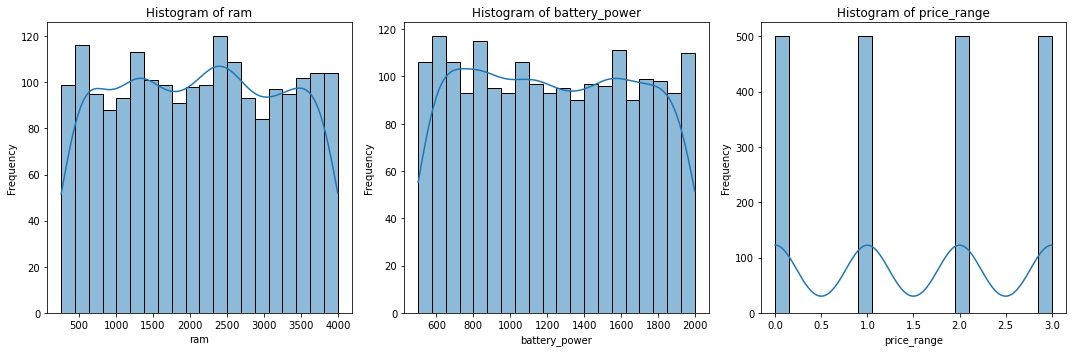

In [118]:
# Sampled columns for exploration
sampled_columns = ['ram', 'battery_power', 'price_range']

# 1. Histogram
plt.figure(figsize=(15, 5))
for i, column in enumerate(sampled_columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(mobile_data[column], bins=20, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

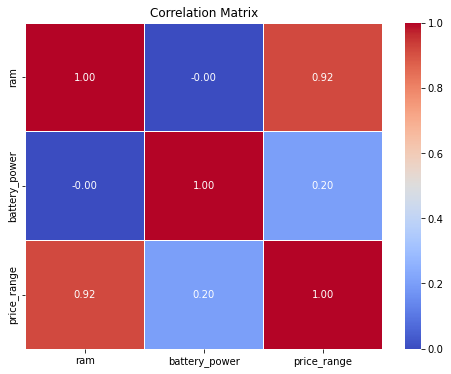

In [119]:

# 2. Correlation Matrix
correlation_matrix = mobile_data[sampled_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

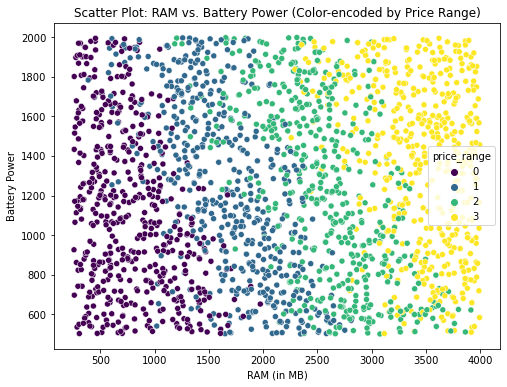

In [120]:
# 3. Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ram', y='battery_power', hue='price_range', data=mobile_data, palette='viridis')
plt.title('Scatter Plot: RAM vs. Battery Power (Color-encoded by Price Range)')
plt.xlabel('RAM (in MB)')
plt.ylabel('Battery Power')
plt.show()

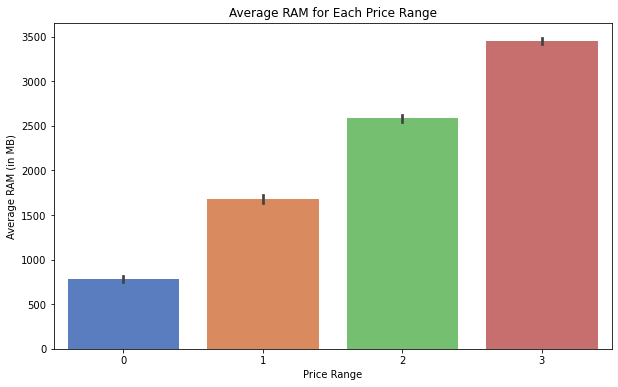

In [121]:
# 4. Bar Graph
plt.figure(figsize=(10, 6))
sns.barplot(x='price_range', y='ram', data=mobile_data, palette='muted')
plt.title('Average RAM for Each Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average RAM (in MB)')
plt.show()


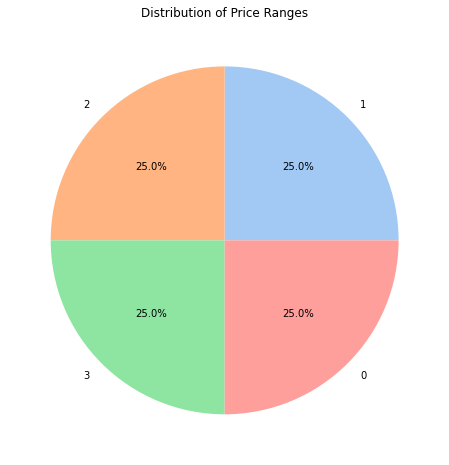

In [122]:

# 5. Pie Chart
price_range_counts = mobile_data['price_range'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(price_range_counts, labels=price_range_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribution of Price Ranges')
plt.show()


# 4. Decision Trees + Overfitting

In [123]:

# 4. Decision Trees + Overfitting
print("4. Decision Trees + Overfitting:")
# Select features and target variable
X = mobile_data.drop('price_range', axis=1)
y = mobile_data['price_range']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the decision tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Evaluate the model
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Decision Tree Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("\n")



4. Decision Trees + Overfitting:
Decision Tree Accuracy: 0.8325
Confusion Matrix:
[[ 92  13   0   0]
 [ 10  76   5   0]
 [  0  12  64  16]
 [  0   0  11 101]]




# 5. Classification: Rule-based + kNN + Naïve Bayes

In [132]:

# 5. Classification: Rule-based + kNN + Naïve Bayes 
print("5. Classification: Rule-based + kNN + Naïve Bayes")

# Rule-based classification function
def rule_based_classifier(row):
    if row['ram'] >= 2000 and row['int_memory'] >= 16:
        return 3
    elif row['ram'] >= 1000:
        return 2
    else:
        return 1

# Apply the rule-based classifier to the test set
rule_based_predictions = X_test.apply(rule_based_classifier, axis=1)

# Evaluate the rule-based classifier
rule_based_accuracy = accuracy_score(y_test, rule_based_predictions)
rule_based_conf_matrix = confusion_matrix(y_test, rule_based_predictions)


# Initialize and train the kNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Initialize and train the Naïve Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Evaluate the models
knn_accuracy = knn_model.score(X_test, y_test)
nb_accuracy = nb_model.score(X_test, y_test)

print("Rule-based Classifier Accuracy:", rule_based_accuracy)
print("Confusion Matrix:")
print(rule_based_conf_matrix)
print("\n")
print("kNN Accuracy:", knn_accuracy)
print("Naïve Bayes Accuracy:", nb_accuracy)


5. Classification: Rule-based + kNN + Naïve Bayes
Rule-based Classifier Accuracy: 0.2975
Confusion Matrix:
[[ 0 74 31  0]
 [ 0  6 63 22]
 [ 0  0 27 65]
 [ 0  0 26 86]]


kNN Accuracy: 0.9425
Naïve Bayes Accuracy: 0.7975


# 6. Classification: SVM + Ensemble

In [133]:
# Import necessary libraries for SVM and Ensemble
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# 6. Classification: SVM + Ensemble
print("6. Classification: SVM + Ensemble:")
# Initialize and train the Support Vector Machine (SVM) model
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train, y_train)

# Initialize and train a Random Forest Ensemble model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the models
svm_accuracy = svm_model.score(X_test, y_test)
rf_accuracy = rf_model.score(X_test, y_test)

print("SVM Accuracy:", svm_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("\n")

6. Classification: SVM + Ensemble:
SVM Accuracy: 0.97
Random Forest Accuracy: 0.8925




# 7. Clustering

7. Clustering:


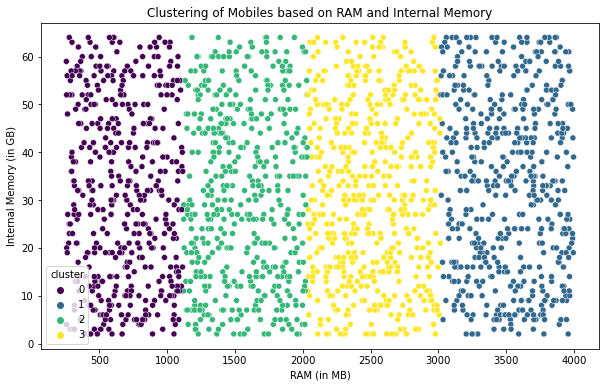

In [134]:

# 7. Clustering
print("7. Clustering:")
# Import necessary libraries for clustering
from sklearn.cluster import KMeans

# Select features for clustering (e.g., RAM and Internal Memory)
clustering_features = ['ram', 'int_memory']
X_cluster = mobile_data[clustering_features]

# Initialize and fit the KMeans clustering model
kmeans = KMeans(n_clusters=4, random_state=42)
mobile_data['cluster'] = kmeans.fit_predict(X_cluster)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ram', y='int_memory', hue='cluster', data=mobile_data, palette='viridis')
plt.title('Clustering of Mobiles based on RAM and Internal Memory')
plt.xlabel('RAM (in MB)')
plt.ylabel('Internal Memory (in GB)')
plt.show()

# 8. Association Rule Mining

In [135]:
# !pip install mlxtend #Uncomment to install if not available

In [136]:
print("Unique values in 'price_range' column:", association_data['price_range'].unique())

Unique values in 'price_range' column: [1 0]


In [137]:
# 8. Association Rule Mining (Updated)
print("8. Association Rule Mining (Updated):")
# Select relevant features for association rule mining
association_features = ['wifi', 'four_g', 'price_range']
association_data = mobile_data[association_features]

# Convert categorical variables to boolean for association rule mining
association_data['price_range'] = (association_data['price_range'] > 0).astype(int)
association_data = pd.get_dummies(association_data, columns=['wifi', 'four_g'], drop_first=True)

# Find frequent itemsets using Apriori algorithm
frequent_itemsets = apriori(association_data, min_support=0.1, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.7)
print("Association Rules:")
print(rules)
print("\n")


8. Association Rule Mining (Updated):
Association Rules:
          antecedents    consequents  antecedent support  consequent support  \
0            (wifi_1)  (price_range)              0.5070                0.75   
1          (four_g_1)  (price_range)              0.5215                0.75   
2  (wifi_1, four_g_1)  (price_range)              0.2600                0.75   

   support  confidence      lift  leverage  conviction  zhangs_metric  
0   0.3830    0.755424  1.007232  0.002750    1.022177       0.014564  
1   0.3920    0.751678  1.002237  0.000875    1.006757       0.004665  
2   0.2015    0.775000  1.033333  0.006500    1.111111       0.043592  




C:\Users\n\AppData\Local\Temp\ipykernel_2676\3860843413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  association_data['price_range'] = (association_data['price_range'] > 0).astype(int)
C:\Users\n\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


# 9. Big Data: Hadoop + MapReduce

In [138]:
# !pip install mrjob #Uncomment to install if not available

In [139]:
# 9. Big Data: Hadoop + MapReduce
print("9. Big Data: Hadoop + MapReduce:")
# Save this code in a file, e.g., mobile_count_mapper.py

from mrjob.job import MRJob
from mrjob.step import MRStep

class MobileCountJob(MRJob):

    def mapper(self, _, line):
        # Split the CSV line
        values = line.strip().split(',')
        
        # Emit each value in the 'ram' column with count 1
        yield values[13], 1

    def combiner(self, key, counts):
        # Sum the counts for each value
        yield key, sum(counts)

    def reducer(self, key, counts):
        # Output the total count for each value
        yield key, sum(counts)

if __name__ == '__main__':
    MobileCountJob().run()

#  To run this job locally, use the following command in your terminal: python mobile_count_mapper.py mobile_prices.csv


9. Big Data: Hadoop + MapReduce:


usage: ipykernel_launcher.py [options] [input files]
ipykernel_launcher.py: error: unrecognized arguments: -f


SystemExit: 2

C:\Users\n\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3377: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# 10. Big Data: Spark

In [140]:
# Import necessary libraries for Spark and PySpark
from pyspark.sql import SparkSession
from pyspark.ml.feature import PCA
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# 10. Big Data: Spark
print("10. Big Data: Spark:")
# Initialize Spark session
spark = SparkSession.builder.appName("MobilePrices").getOrCreate()

# Load the dataset into a Spark DataFrame
spark_mobile_data = spark.read.csv("C:\\Users\\n\\Downloads\\mobile prices.csv", header=True, inferSchema=True)

# Perform basic operations using Spark DataFrame (e.g., show the first few rows)
spark_mobile_data.show(5)


10. Big Data: Spark:
+-------------+----+-----------+--------+---+------+----------+-----+---------+-------+---+---------+--------+----+----+----+---------+-------+------------+----+-----------+
|battery_power|blue|clock_speed|dual_sim| fc|four_g|int_memory|m_dep|mobile_wt|n_cores| pc|px_height|px_width| ram|sc_h|sc_w|talk_time|three_g|touch_screen|wifi|price_range|
+-------------+----+-----------+--------+---+------+----------+-----+---------+-------+---+---------+--------+----+----+----+---------+-------+------------+----+-----------+
|          842|   0|        2.2|       0|  1|     0|         7|  0.6|      188|      2|  2|       20|     756|2549|   9|   7|       19|      0|           0|   1|          1|
|         1021|   1|        0.5|       1|  0|     1|        53|  0.7|      136|      3|  6|      905|    1988|2631|  17|   3|        7|      1|           1|   0|          2|
|          563|   1|        0.5|       1|  2|     1|        41|  0.9|      145|      5|  6|     1263|    1716

# 11. Big Data: Curse of Dimensionality + Principal Component Analysis

In [141]:
# 11. Big Data: Curse of Dimensionality + Principal Component Analysis
print("11. Big Data: Curse of Dimensionality + Principal Component Analysis:")
# Apply Principal Component Analysis (PCA) using Spark MLlib

# Convert features to vector
from pyspark.ml.feature import VectorAssembler
feature_cols = spark_mobile_data.columns[:-1]
assembler = VectorAssembler(inputCols=feature_cols, outputCol='features')
spark_mobile_data = assembler.transform(spark_mobile_data)

# Apply PCA
pca = PCA(k=5, inputCol='features', outputCol='pca_features')
pca_model = pca.fit(spark_mobile_data)
transformed_data = pca_model.transform(spark_mobile_data)

# Show the transformed data
transformed_data.select('pca_features').show(5, truncate=False)

11. Big Data: Curse of Dimensionality + Principal Component Analysis:
+--------------------------------------------------------------------------------------------------+
|pca_features                                                                                      |
+--------------------------------------------------------------------------------------------------+
|[-2549.103138015877,560.4619954589616,-820.3819006564911,-541.5099305237064,-187.8721200291185]   |
|[-2623.4907790173547,2052.872594075998,-974.8231505737197,-829.7997675566984,-134.71542505250451] |
|[-2591.83587154947,2120.192362814396,-530.392765635983,-371.9569102470679,-144.07372841169865]    |
|[-2758.32836764516,2135.9414065855594,-579.668585211679,-455.4715439053401,-130.79528957764606]   |
|[-1399.520859883131,1738.5547517982027,-1801.4925941603829,-93.51655537575225,-139.76901449853113]|
+--------------------------------------------------------------------------------------------------+
only showing top 5 ro

# # 12. Big Data: Applications with PySpark

In [142]:

# 12. Big Data: Applications with PySpark
print("12. Big Data: Applications with PySpark:")
# Apply PySpark for machine learning tasks (e.g., RandomForestClassifier)
# Train-test split
spark_train_data, spark_test_data = spark_mobile_data.randomSplit([0.8, 0.2], seed=42)

# Initialize and train a RandomForestClassifier model
rf_model_spark = RandomForestClassifier(labelCol='price_range', featuresCol='features', numTrees=100)
rf_model_spark = rf_model_spark.fit(spark_train_data)

# Make predictions on the test set
predictions_spark = rf_model_spark.transform(spark_test_data)

# Evaluate the model
evaluator = MulticlassClassificationEvaluator(labelCol='price_range', predictionCol='prediction', metricName='accuracy')
accuracy_spark = evaluator.evaluate(predictions_spark)
print("Random Forest Classifier Accuracy (PySpark):", accuracy_spark)

# Stop the Spark session
spark.stop()


12. Big Data: Applications with PySpark:
Random Forest Classifier Accuracy (PySpark): 0.8212290502793296


In [ ]:
#THE END!